<a href="https://colab.research.google.com/github/yulianacm/Metodos-Numericos-I/blob/main/Polinomiohermite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Polinomio Osculante de Hermite con Sympy

In [1]:
#Importamos las bibliotecas
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#Datos: [(x, y, y')
puntos=[
    (0, 1, 1),
    (1, 2, 1),
    (2, 0, -1)
]


In [15]:
def interpolacionher(puntos):
    x=sp.symbols('x') #Definimos las variables usando sympy
    P=0

    for i, (xi, yi, ypi) in enumerate(puntos): #Iteramos para crear el polinomio
        li = 1
        for j, (xj, _, _) in enumerate(puntos):
            if i != j:
                li *= (x - xj) / (xi - xj)

        hi=(1 - 2 * (x - xi) * sp.diff(li, x).subs(x, xi)) * (li ** 2)
        hpi=(x - xi) * (li ** 2)

        #Agregar términos al polinomio
        P+=yi*hi+ypi*hpi

    return sp.expand(P)

P=interpolacionher(puntos) #Imprimimos los resultados y los mostramos
print("Polinomio de Hermite:")
sp.pprint(P)

Polinomio de Hermite:
   5       4       3       2        
7⋅x    31⋅x    41⋅x    17⋅x         
──── - ───── + ───── - ───── + x + 1
 4       4       4       4          


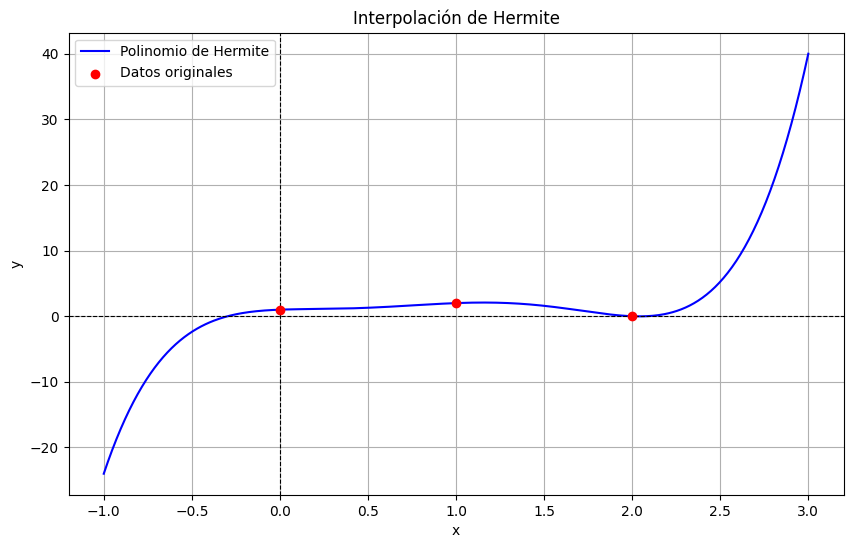

In [16]:
def graficaher(puntos, P):

    #Convertir polinomio a función
    x=sp.symbols('x')
    P_func=sp.lambdify(x, P, modules=['numpy'])

    #Datos
    xdatos=[xi for xi, _, _ in puntos]
    ydatos=[yi for _, yi, _ in puntos]

    #Puntos para la gráfica del polinomio
    xgraf= np.linspace(min(xdatos) - 1, max(xdatos) + 1, 500)
    ygraf= P_func(xgraf)

    #Detalles de la grafica
    plt.figure(figsize=(10, 6))
    plt.plot(xgraf, ygraf, label='Polinomio de Hermite', color='blue')
    plt.scatter(xdatos, ydatos, color='red', label='Datos originales', zorder=5)
    plt.title('Interpolación de Hermite')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
    plt.legend()
    plt.grid(True)
    plt.show()

#Graficar el polinomio y los puntos
graficaher(puntos, P)